In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [2]:
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score,mean_absolute_error,r2_score,mean_squared_error,silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop('Unnamed: 0',axis =1,inplace = True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.duplicated().sum()

0

In [9]:
cols = df.columns

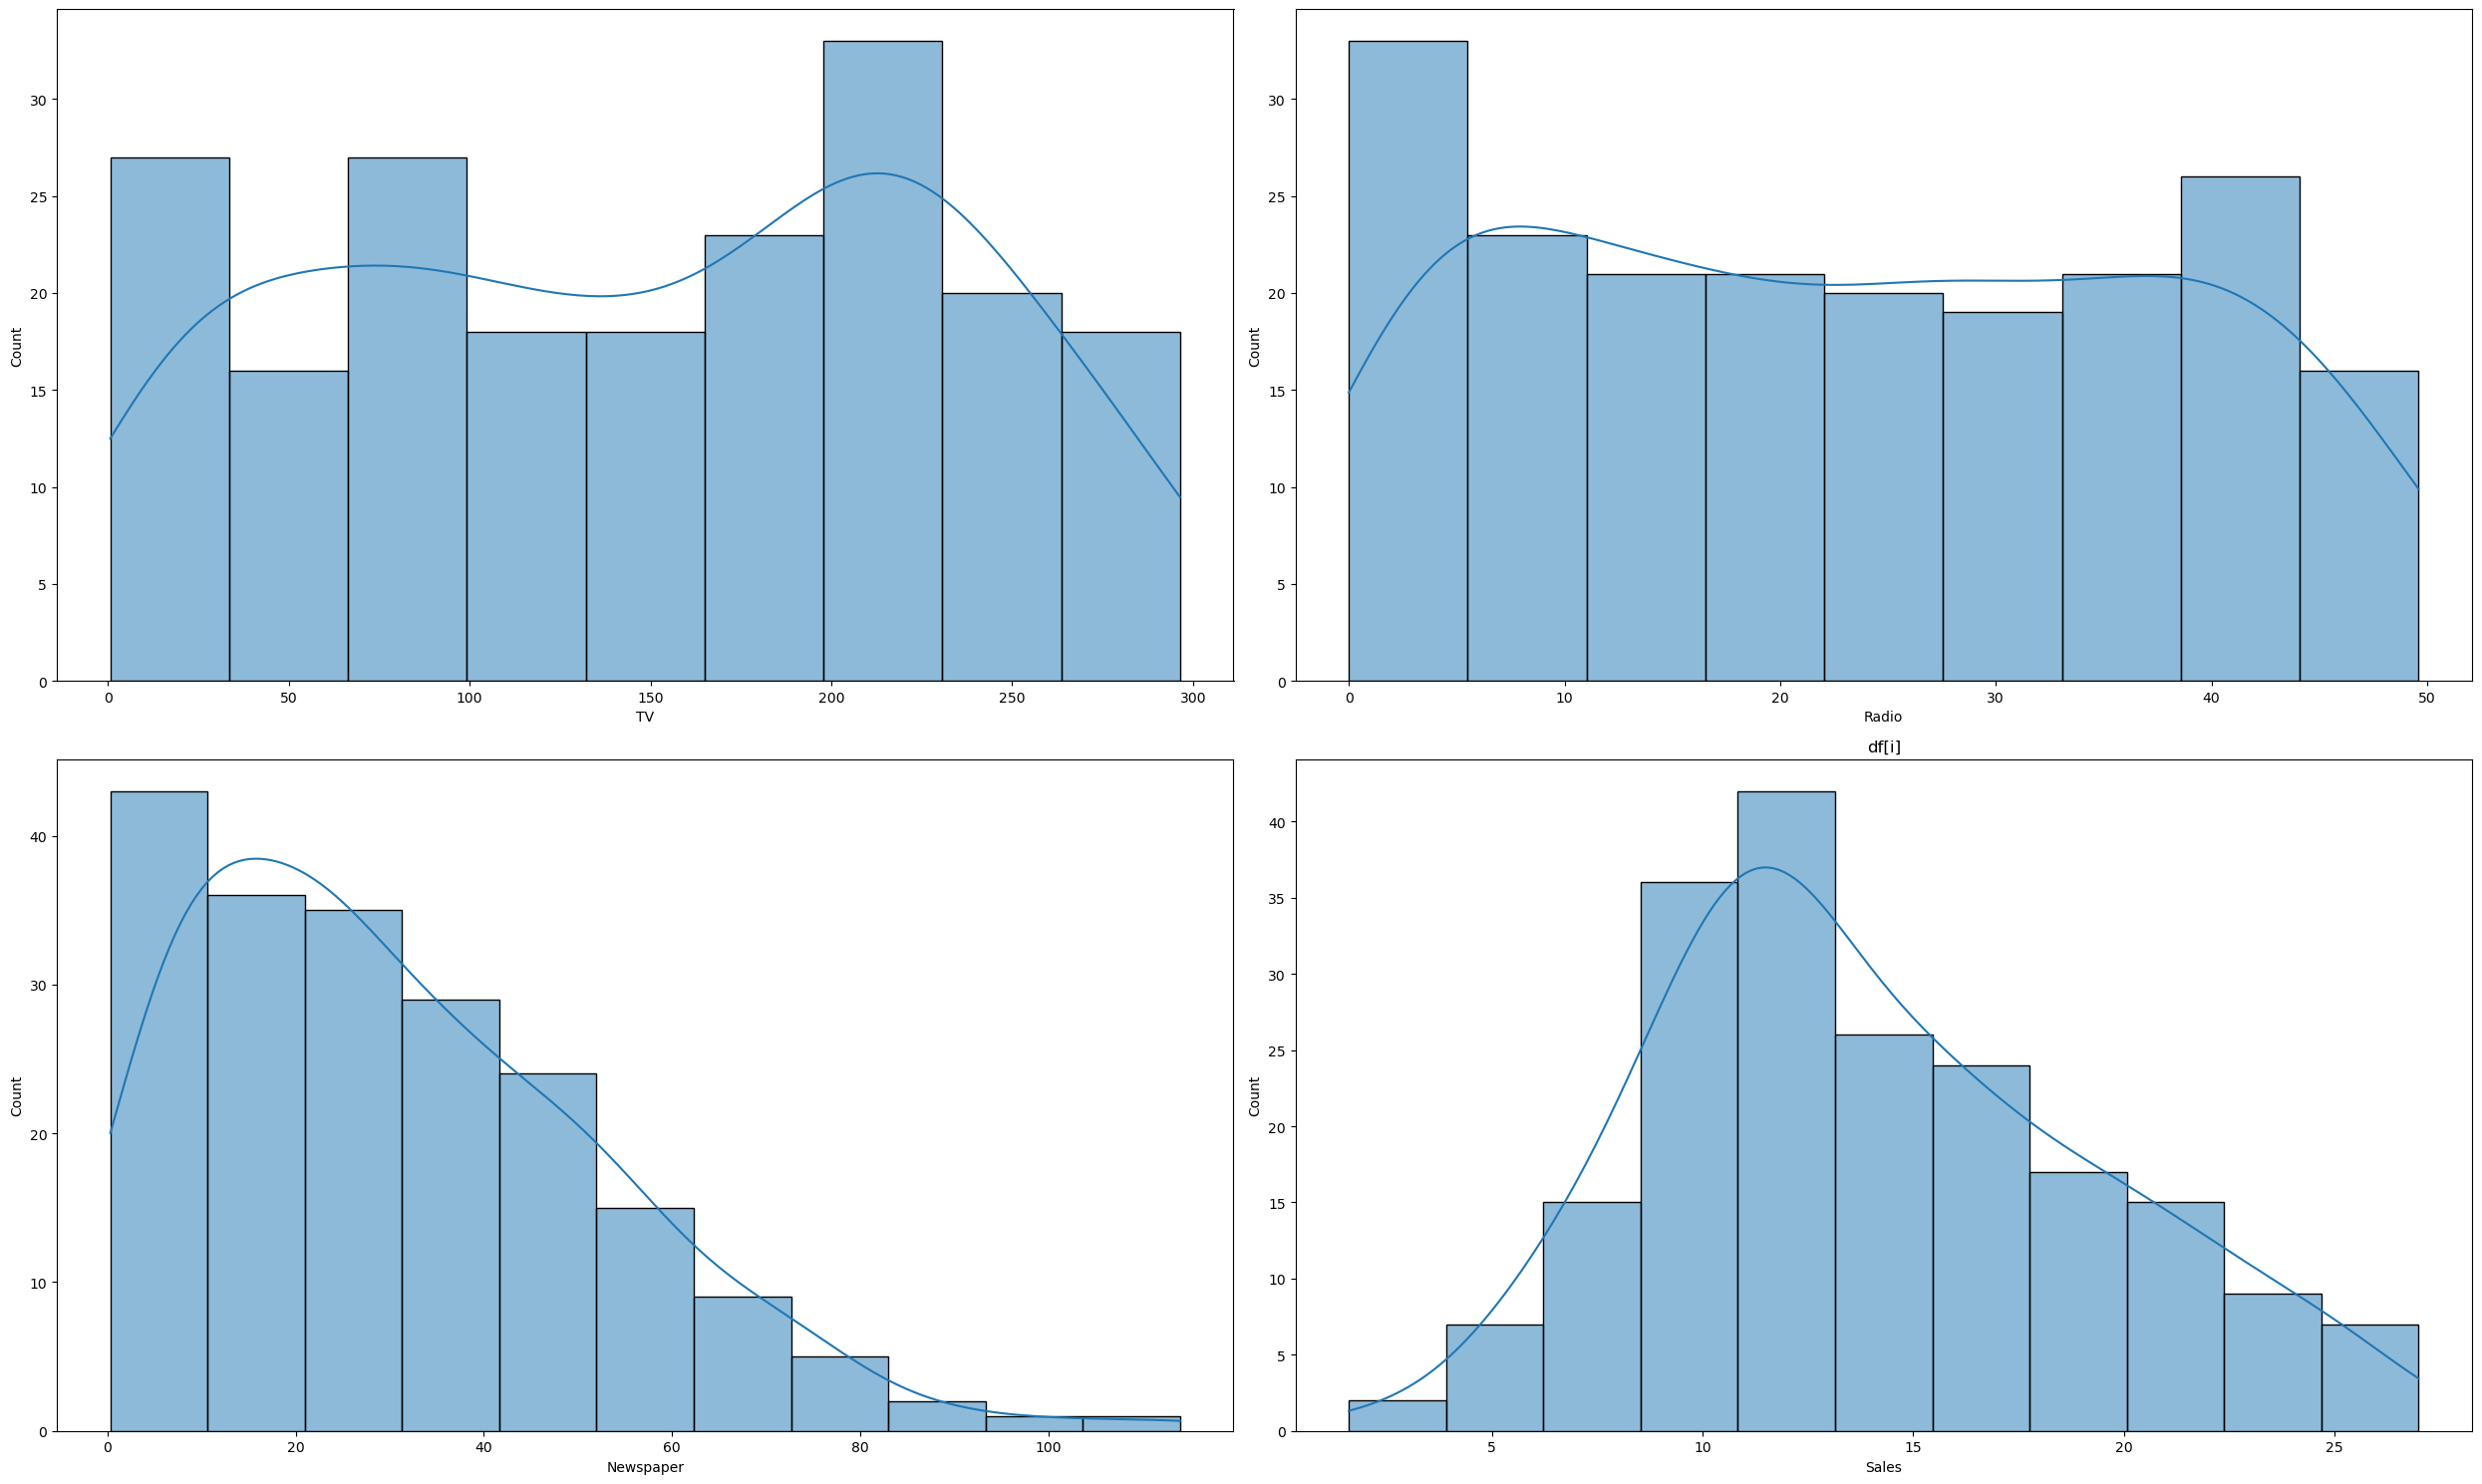

In [10]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

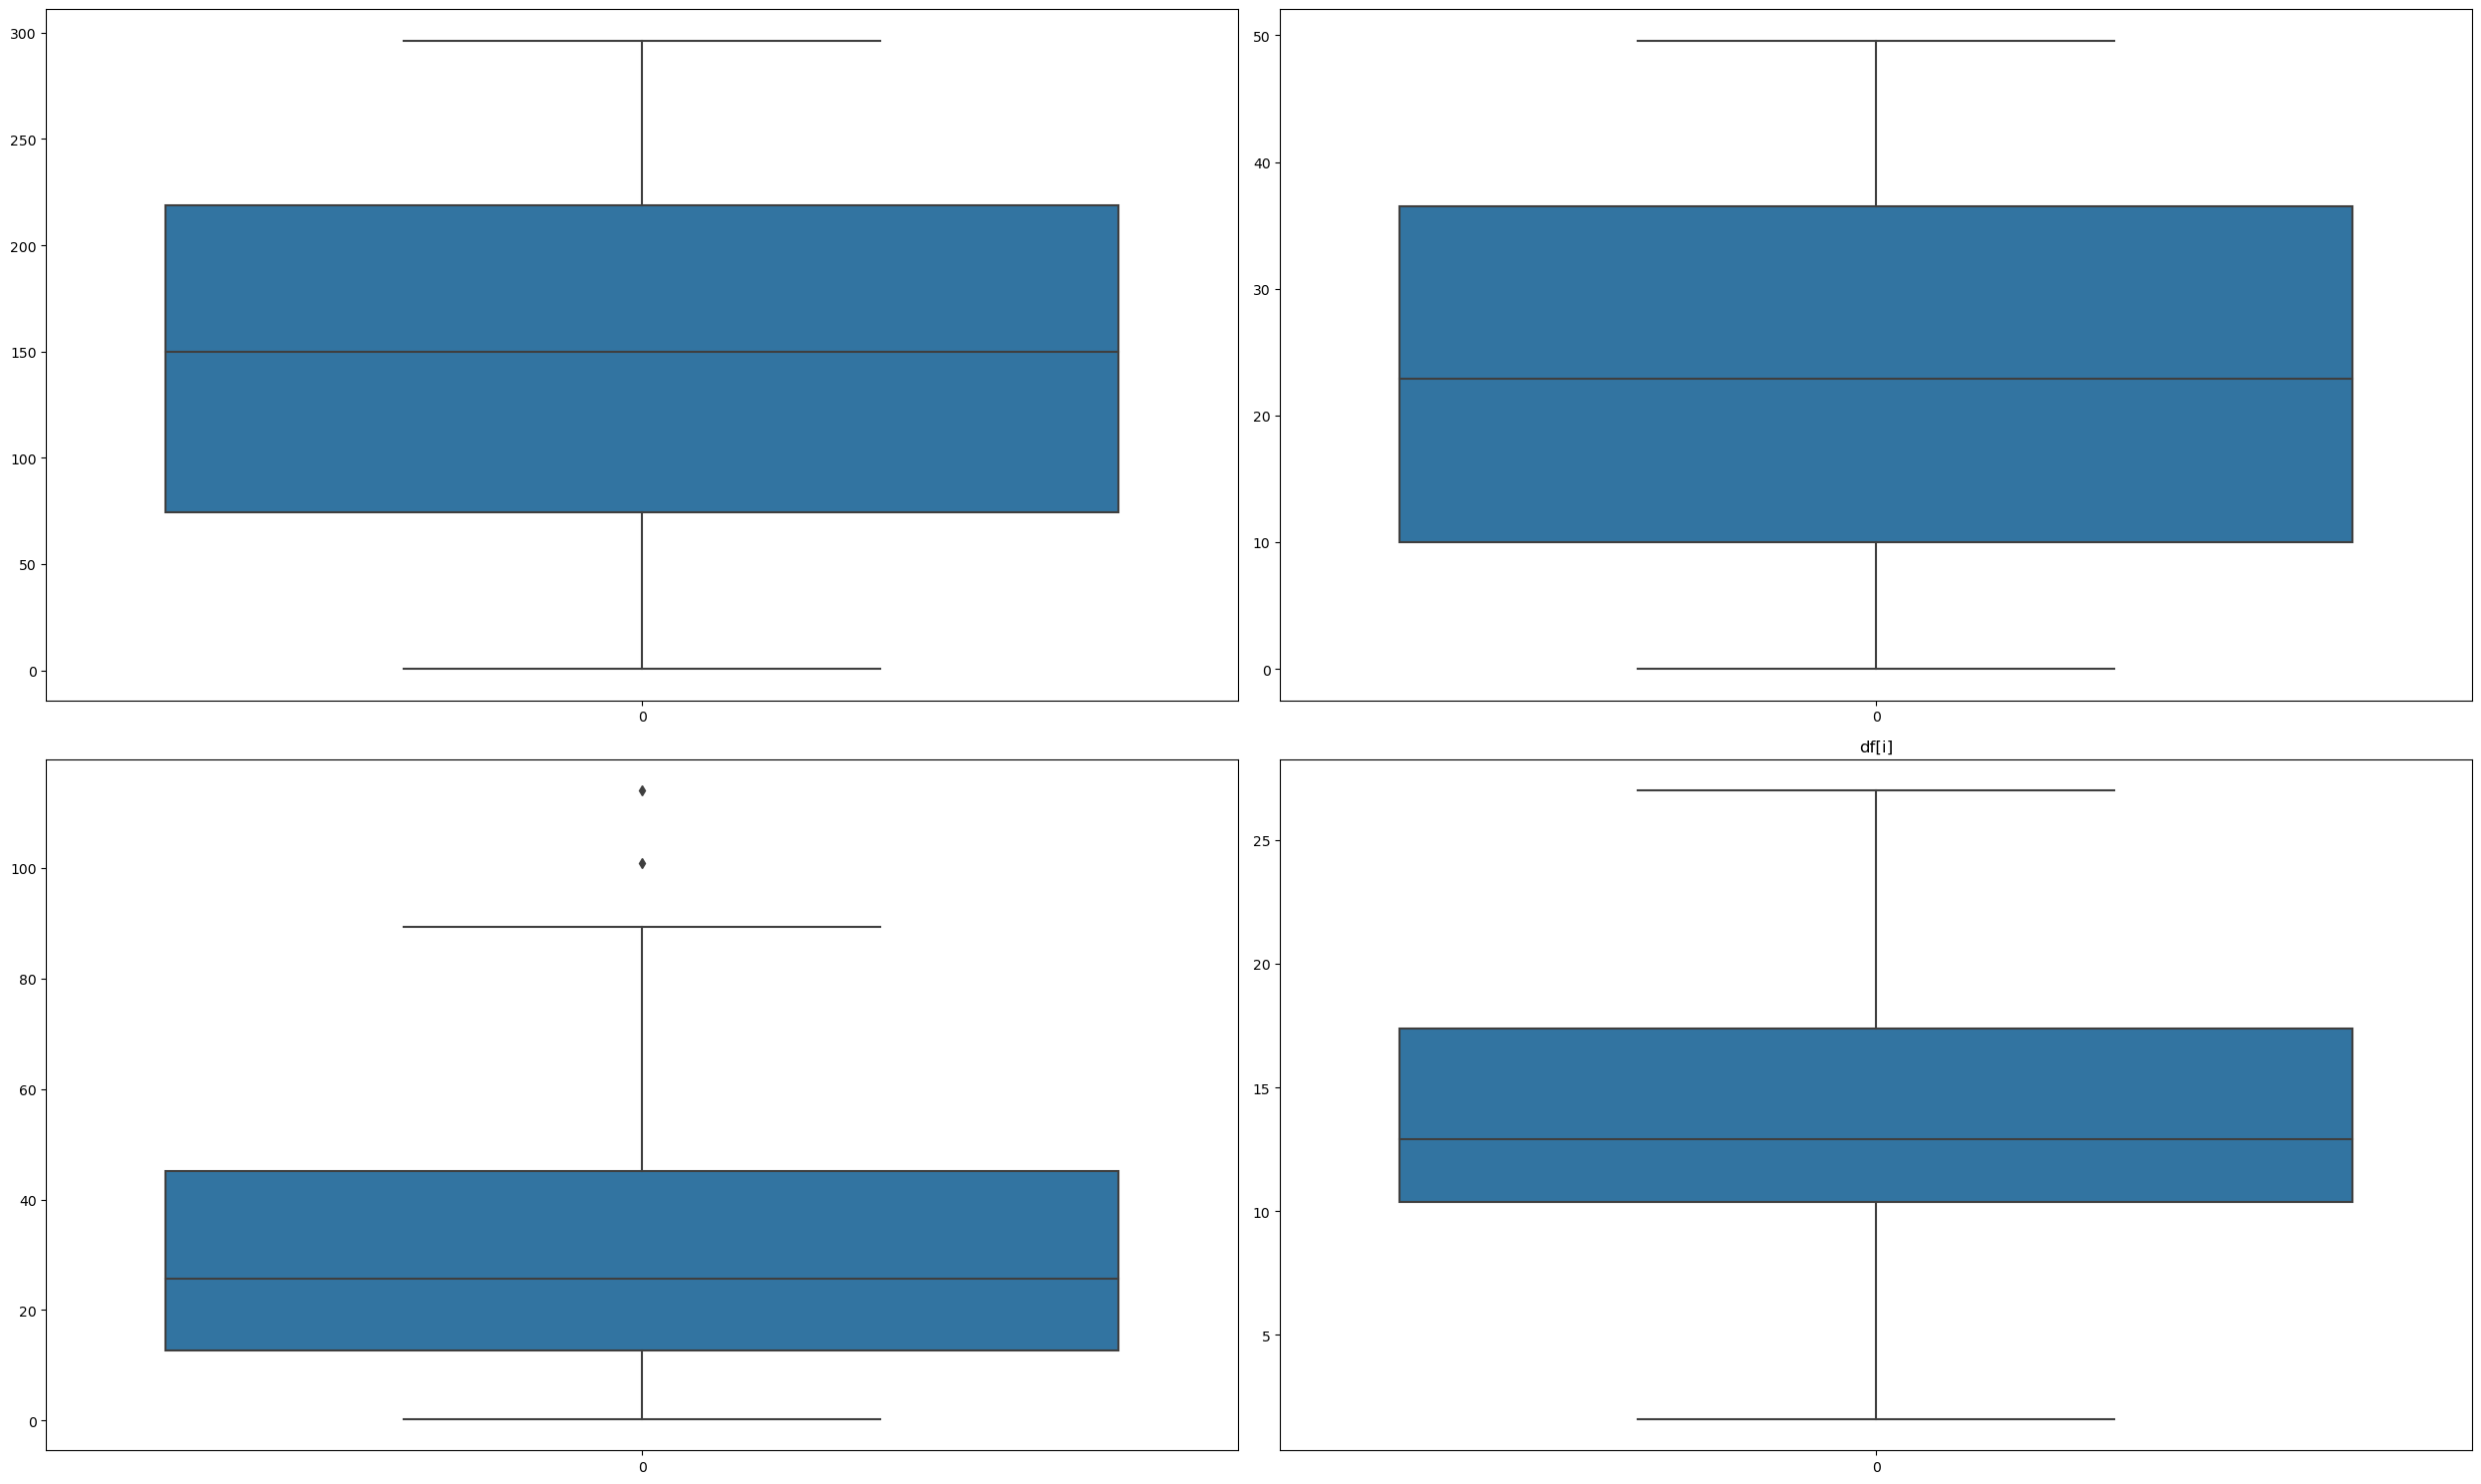

In [11]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

<Axes: >

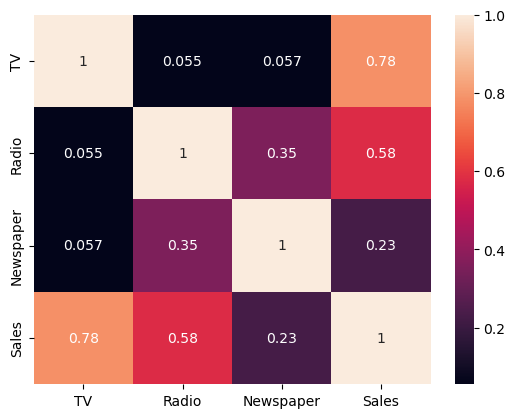

In [12]:
sns.heatmap(df.corr(),annot = True)

In [13]:
px.scatter(df,x='TV',y='Sales',width=800,height=500,title='Sale Vs TV')

In [14]:
px.scatter(df,x='Radio',y='Sales',width=800,height=500,title='Radio Vs TV')

In [15]:
px.scatter(df,x='Newspaper',y='Sales',width=800,height=500,title='Newspaper Vs TV')

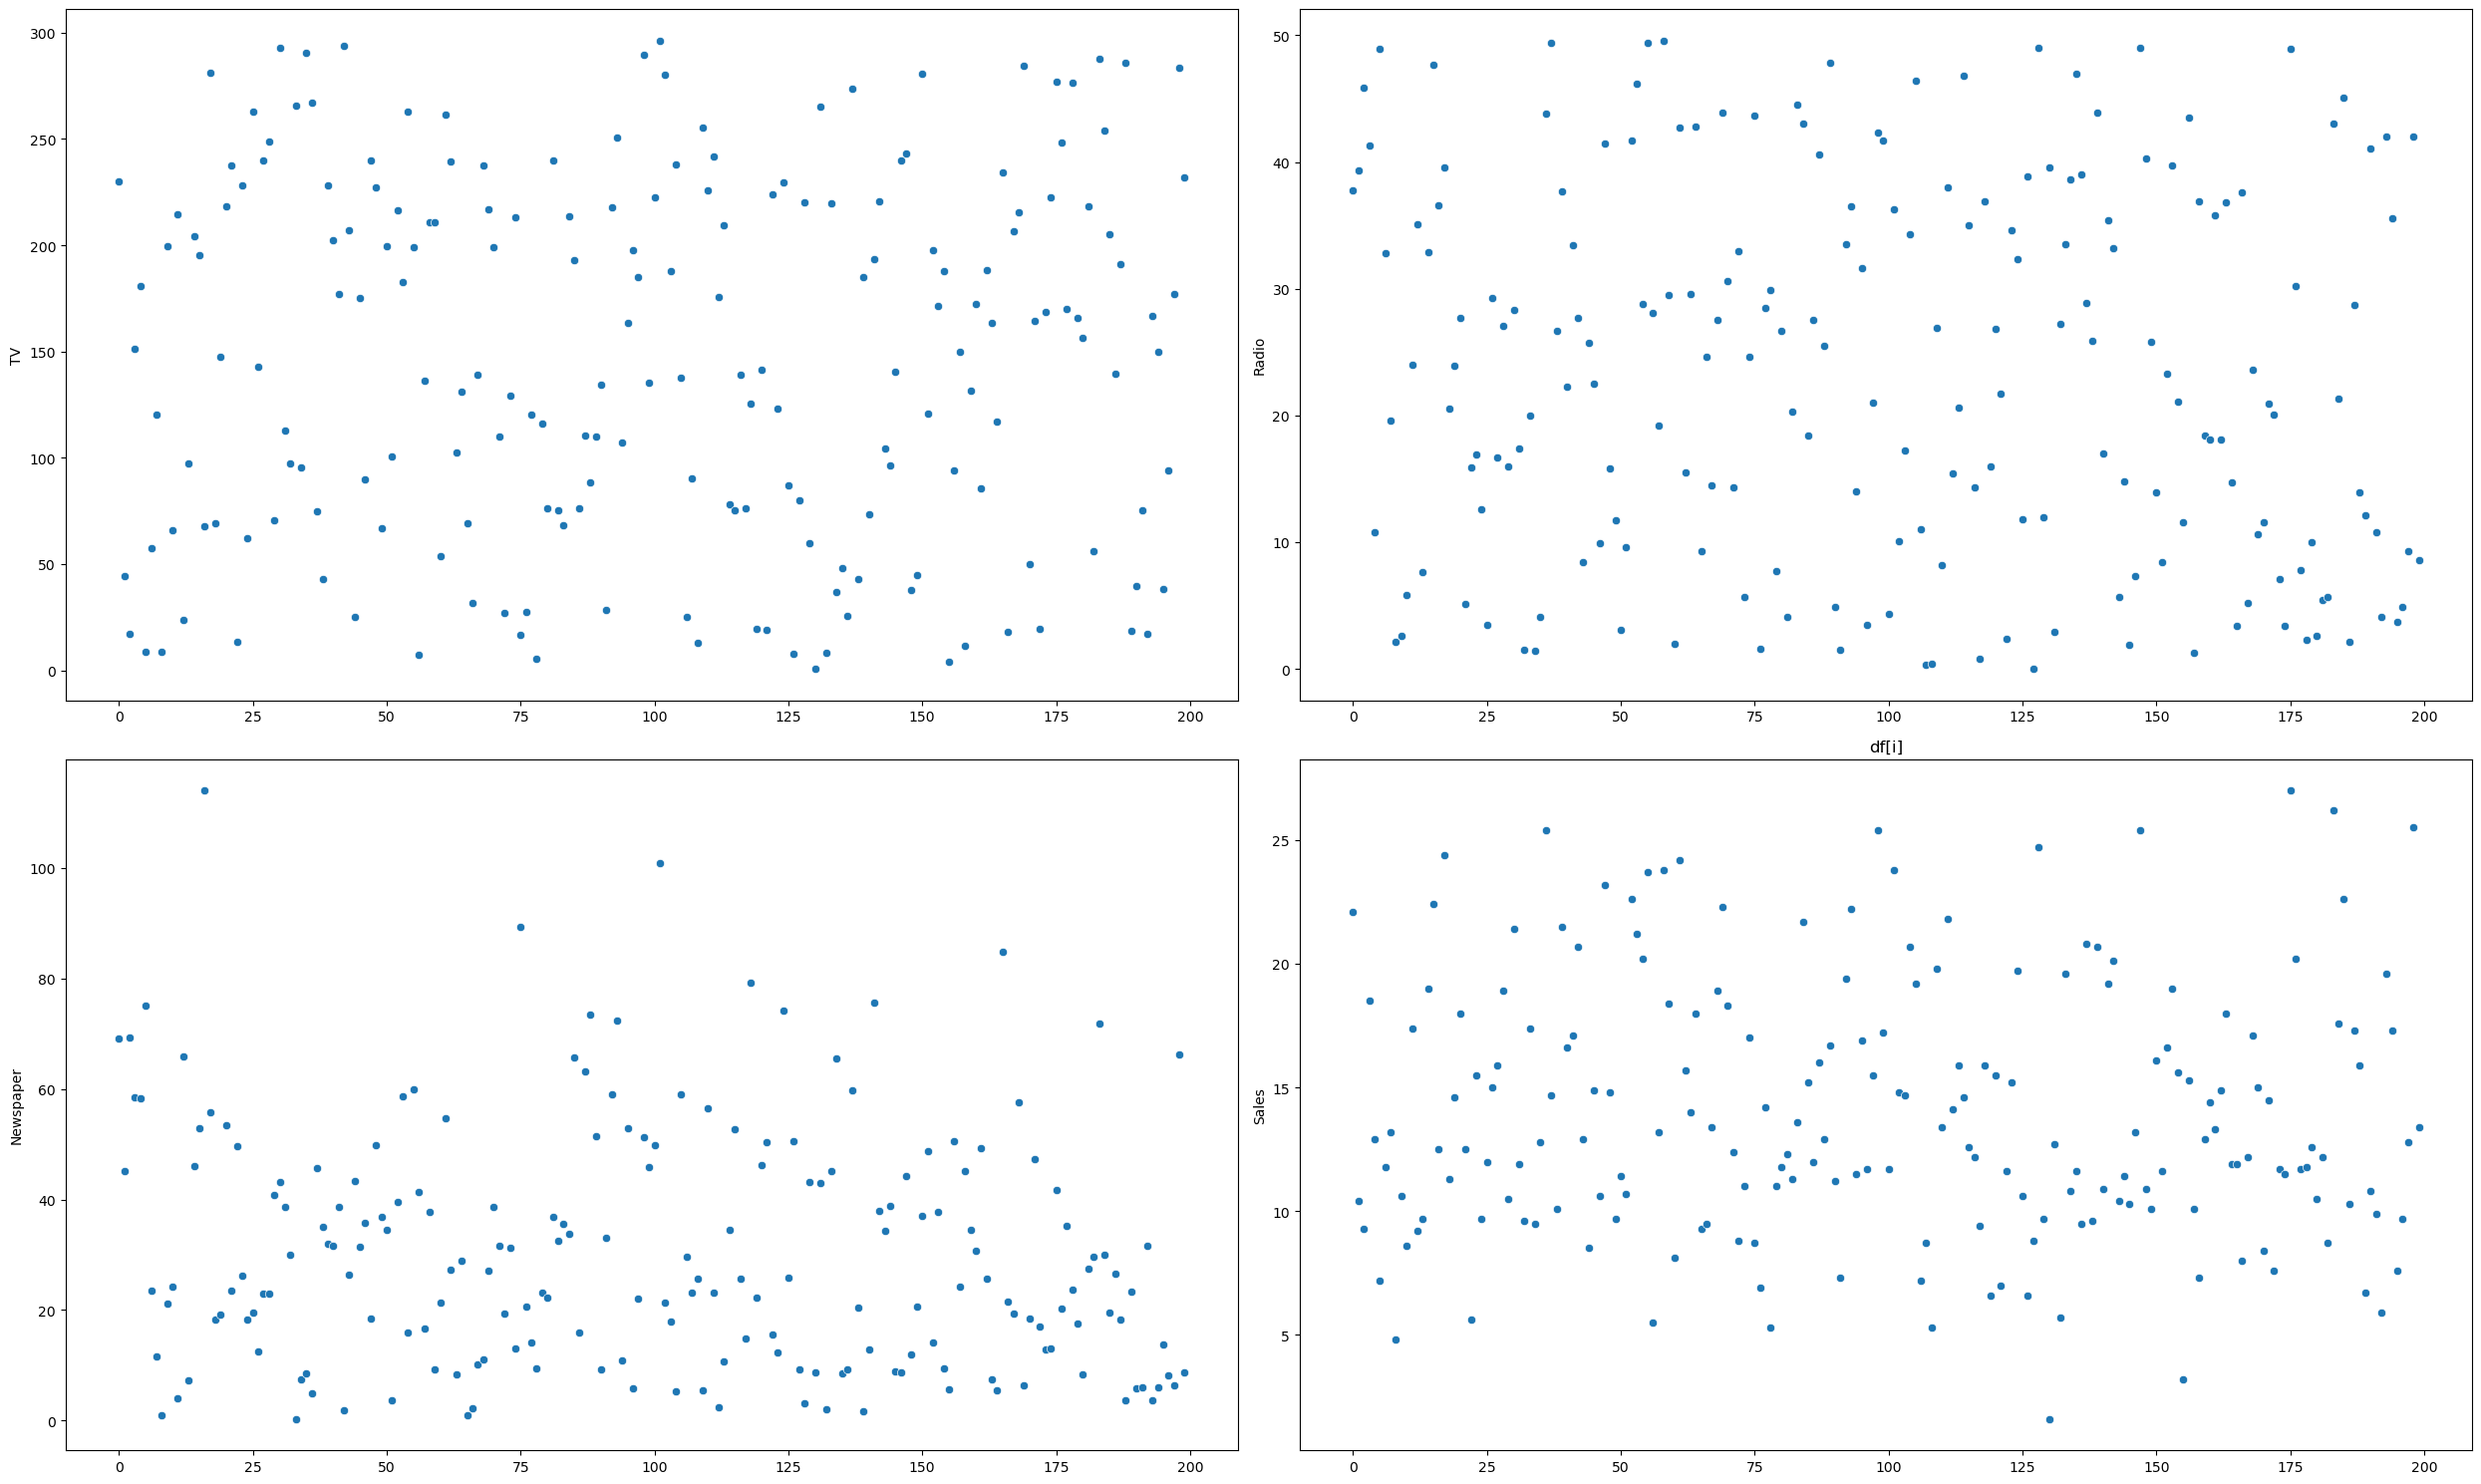

In [16]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

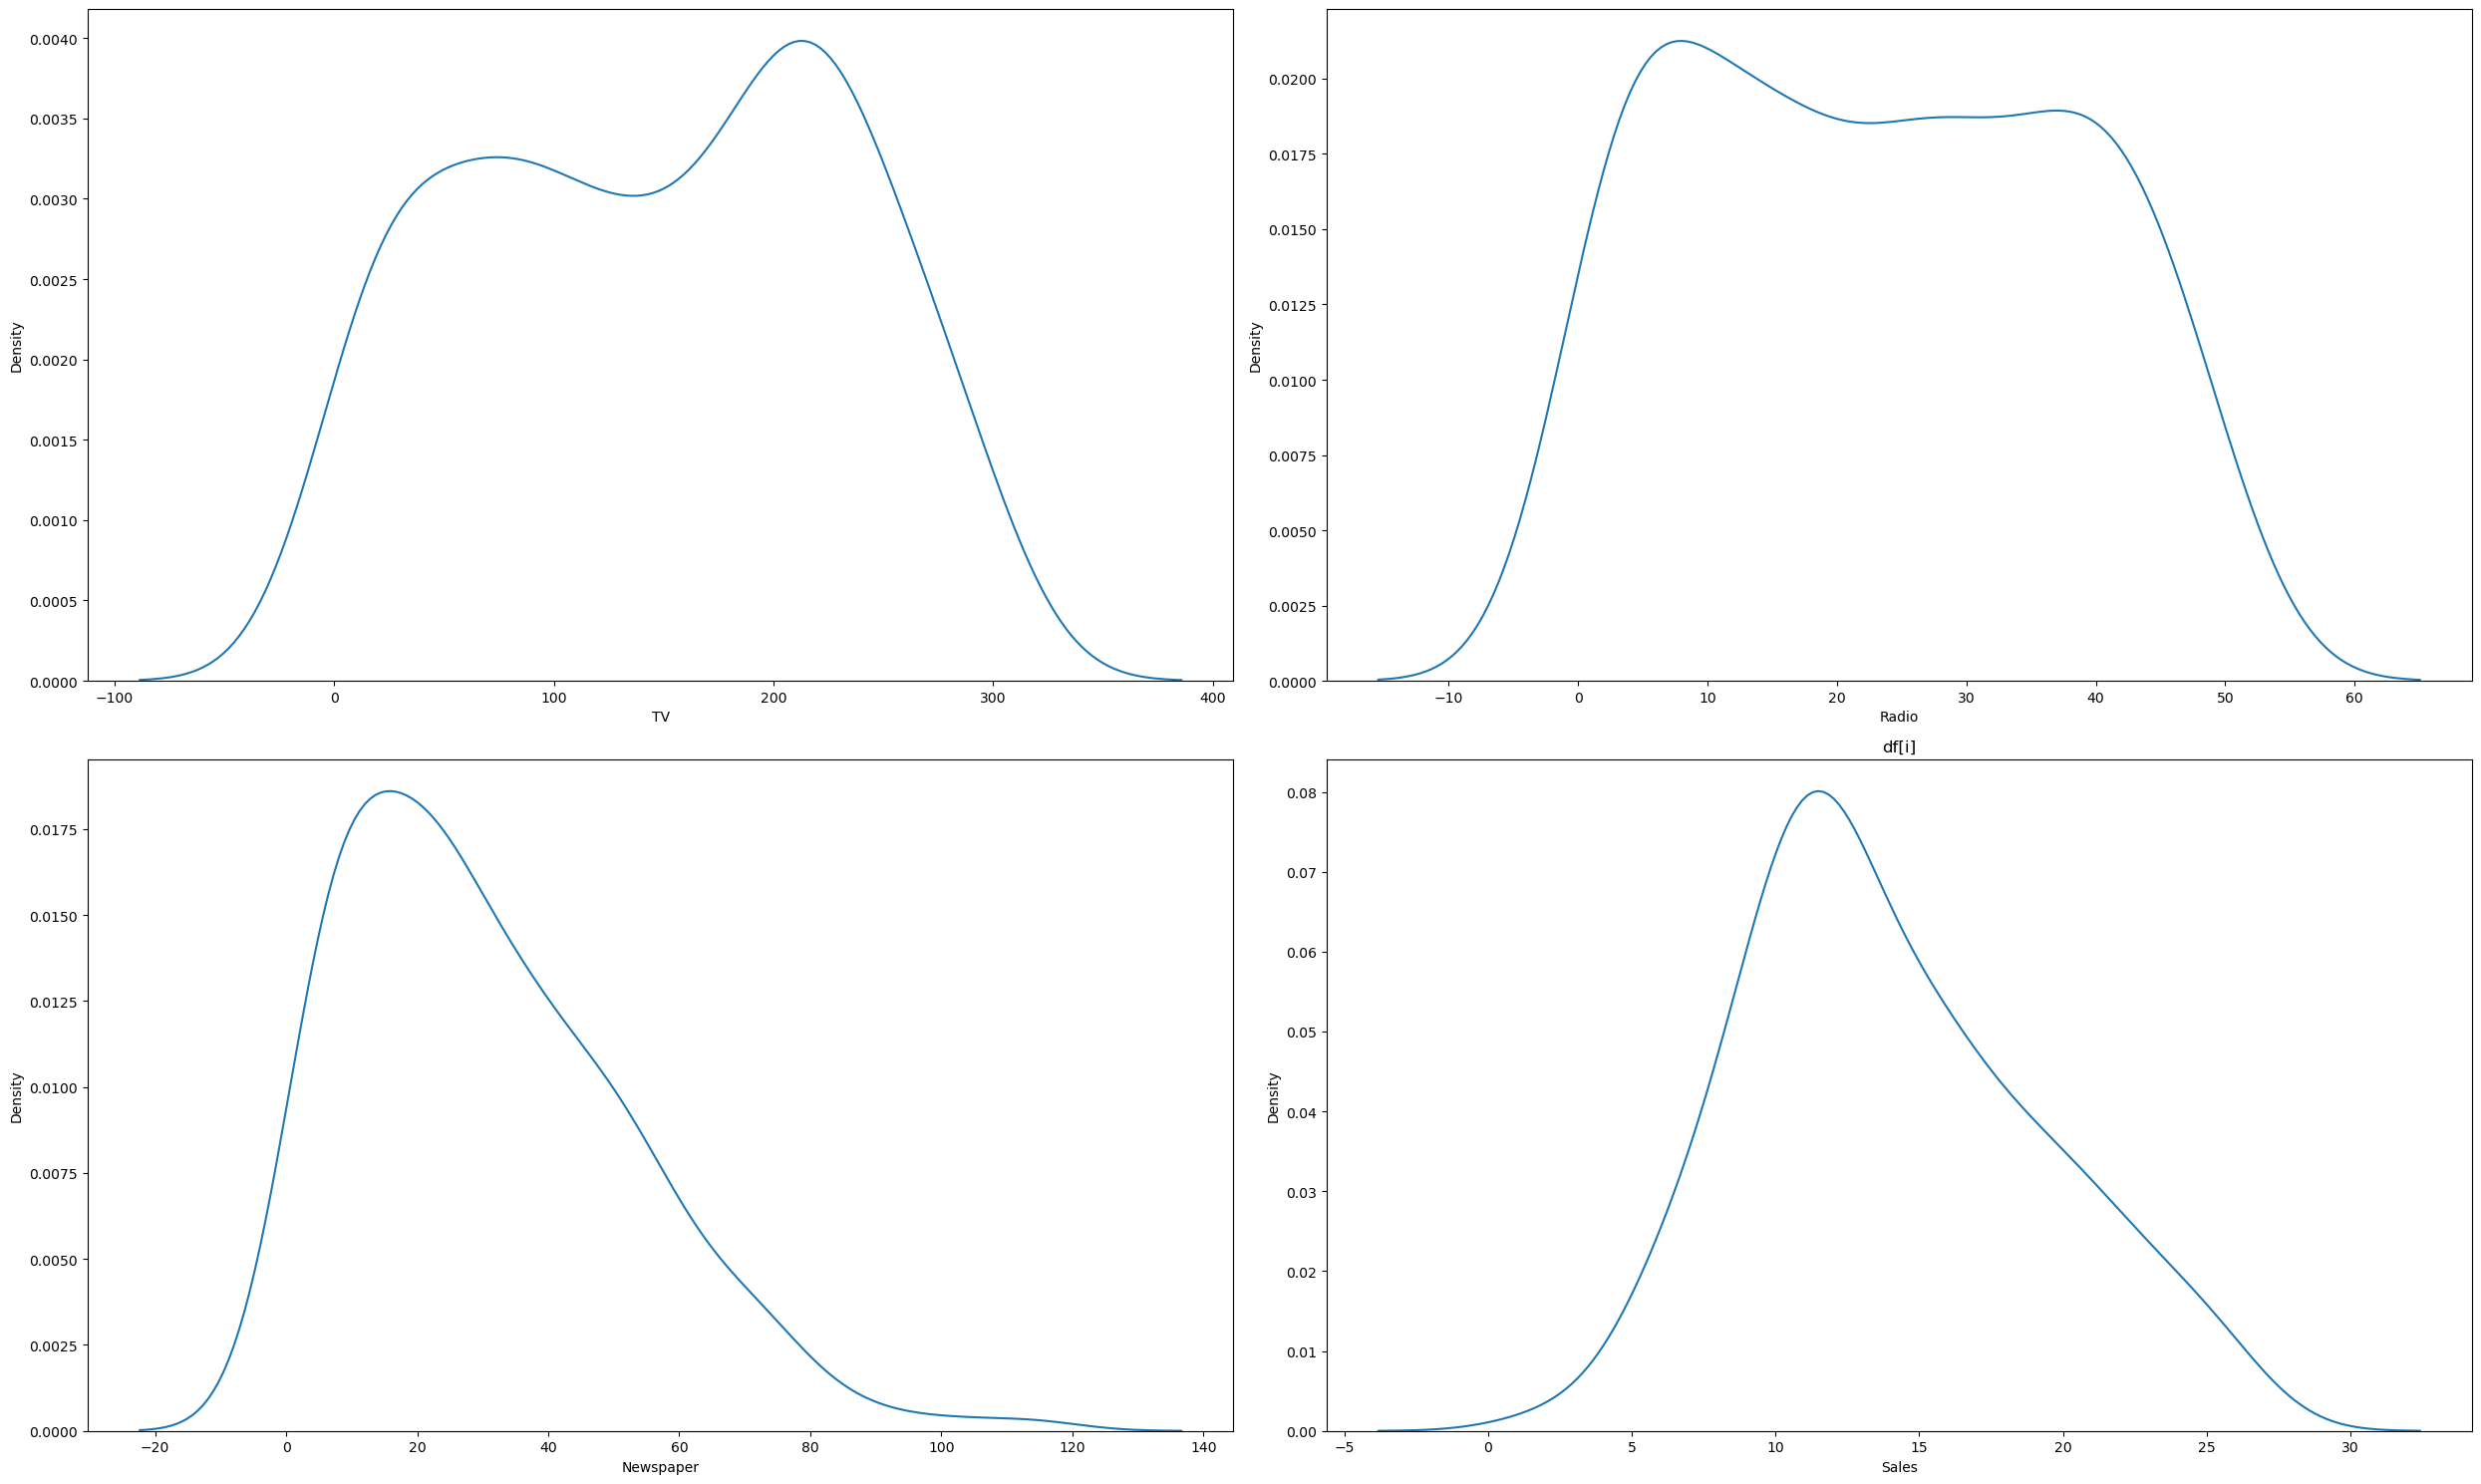

In [17]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.kdeplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
X = df.drop('Sales',axis =1)
y = df["Sales"]
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
# Models that are going to be trained
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": xgboost.XGBRegressor(),
}

# Creating a function to train each regression model and calculate/return regression metrics
def train_reg(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# Lists to store regression metrics
mae_s = []
mse_s = []
r2_s = []

# Train and evaluate regression models
for name, model in regression_models.items():
    mae, mse, r2 = train_reg(model, X_train, y_train, X_test, y_test)
    
    mae_s.append(mae)
    mse_s.append(mse)
    r2_s.append(r2)


In [21]:
scores_df = pd.DataFrame({"Algorithm": regression_models.keys(),"r2_score : ":r2_s,"mse : ": mse_s,'mae : ':mae_s})
scores_df

,Algorithm,r2_score :,mse :,mae :
0,Linear Regression,0.757589,4.503126,1.646275
1,Decision Tree Regressor,0.955387,0.828750,0.672500
2,SVR,0.675391,6.030077,1.786495
3,Random Forest Regressor,0.971690,0.525905,0.578525
4,AdaBoost Regressor,0.940927,1.097373,0.852238
5,Gradient Boosting Regressor,0.974640,0.471100,0.559387
6,XGBoost Regressor,0.976863,0.429812,0.523696


In [22]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test set
X_test_scaled = scaler.transform(X_test)
# Models that are going to be trained
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": xgboost.XGBRegressor(),
}

# Creating a function to train each regression model and calculate/return regression metrics
def train_reg(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# Lists to store regression metrics
mae_s = []
mse_s = []
r2_s = []

# Train and evaluate regression models
for name, model in regression_models.items():
    mae, mse, r2 = train_reg(model, X_train_scaled, y_train, X_test_scaled, y_test)
    
    mae_s.append(mae)
    mse_s.append(mse)
    r2_s.append(r2)
# Assuming you have already scaled the features and trained the regression models
# Code for scaling the features and training the regression models (as shown in the previous response)

# Create the DataFrame
scal_scores_df = pd.DataFrame({
    "Algorithm": regression_models.keys(),
    "r2_score": r2_s,
    "mse": mse_s,
    "mae": mae_s
})

# Display the DataFrame
scal_scores_df

,Algorithm,r2_score,mse,mae
0,Linear Regression,0.757589,4.503126,1.646275
1,Decision Tree Regressor,0.948429,0.958000,0.760000
2,SVR,0.889511,2.052497,0.919952
3,Random Forest Regressor,0.971000,0.538721,0.574275
4,AdaBoost Regressor,0.940185,1.111153,0.855775
5,Gradient Boosting Regressor,0.975309,0.458675,0.549715
6,XGBoost Regressor,0.976863,0.429812,0.523696


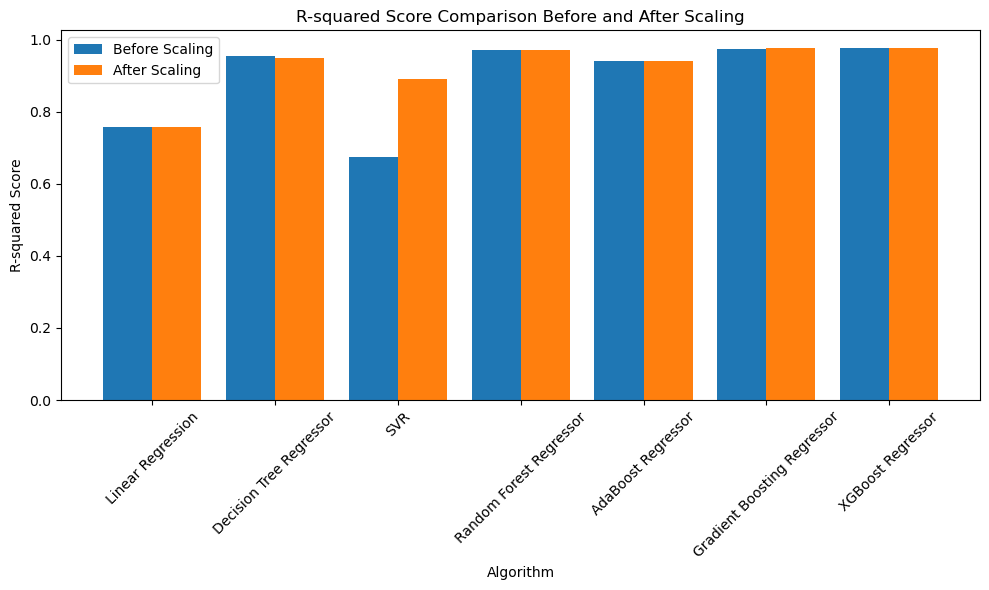

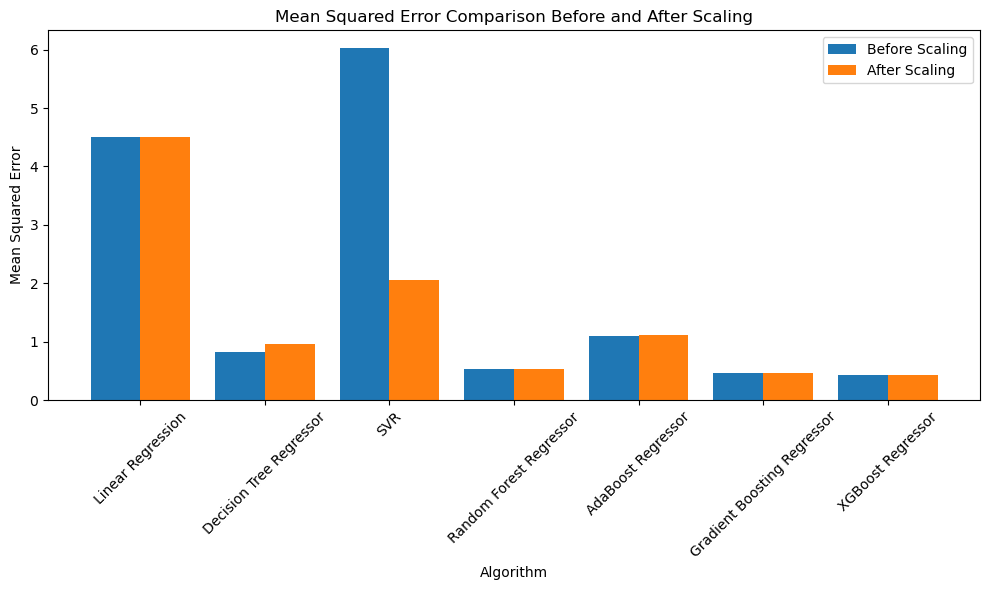

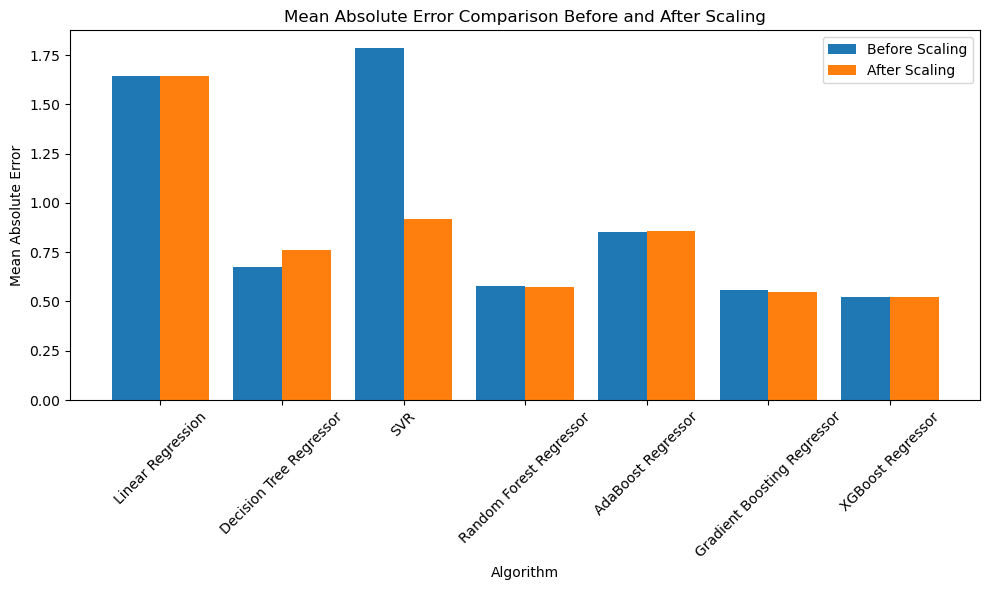

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data before scaling
r2_scores_before = scores_df['r2_score : ']
mse_before = scores_df['mse : ']
mae_before = scores_df['mae : ']
# Data after scaling
r2_scores_after = scal_scores_df['r2_score']
mse_after =scal_scores_df['mse']
mae_after = scal_scores_df['mae']
# Create a list of algorithm names
algorithms = list(regression_models.keys())

# Create an array for the x-axis positions
x_positions = np.arange(len(algorithms))

# Plotting the R-squared scores before and after scaling
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, r2_scores_before, width=0.4, label='Before Scaling')
plt.bar(x_positions + 0.2, r2_scores_after, width=0.4, label='After Scaling')
plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison Before and After Scaling')
plt.legend()
plt.xticks(x_positions, algorithms, rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Mean Squared Errors before and after scaling
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, mse_before, width=0.4, label='Before Scaling')
plt.bar(x_positions + 0.2, mse_after, width=0.4, label='After Scaling')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison Before and After Scaling')
plt.legend()
plt.xticks(x_positions, algorithms, rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Mean Absolute Errors before and after scaling
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, mae_before, width=0.4, label='Before Scaling')
plt.bar(x_positions + 0.2, mae_after, width=0.4, label='After Scaling')
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Comparison Before and After Scaling')
plt.legend()
plt.xticks(x_positions, algorithms, rotation=45)
plt.tight_layout()
plt.show()
